# Recurrent Neural Network + LSTM
## Aanchal Sharma

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, BatchNormalization

In [3]:
# Generating sample dataset

In [4]:
N=1000
Tp=800

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df=pd.DataFrame(x)
df.head()

,0
0,1.363886
1,2.010233
2,1.614973
3,2.028106
4,0.675330


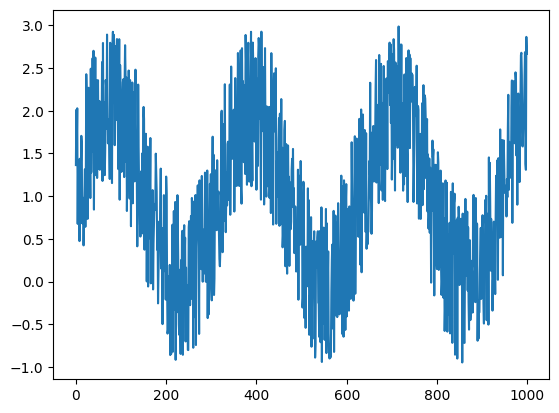

In [5]:
# how it looks in plot

plt.plot(df)
plt.show()

In [6]:
# split 'df' dataset into a training and test parts

In [7]:
values=df.values
train,test=values[0:Tp,:], values[Tp:N,:]

In [8]:
# Preparing the data (reshaping)

In [9]:
step=4
# add step elements into train and test
train=np.append (train,np.repeat(train[-1,],step))

test=np.append(test,np.repeat(test[-1,],step))

In [10]:
test

array([ 0.14658976,  0.46364254,  1.51348589,  1.3942798 ,  0.13652163,
        0.18906056,  1.14589559,  0.71007275,  1.29906296,  0.20906616,
       -0.1556356 , -0.03677836,  0.14012392,  1.14989268, -0.18774608,
        0.74397876,  0.41778078, -0.57805707, -0.3024509 ,  1.18357442,
        0.63310111,  0.28145751,  1.15673894, -0.58610328,  0.54960215,
       -0.03032346,  0.41236422, -0.39138787,  0.68781105, -0.60649226,
        0.19091961,  1.04994439, -0.03137855,  0.19705658, -0.71725857,
        1.14996921,  0.32428185,  0.89994415,  0.93586159,  1.02858837,
       -0.85584385,  0.42311941,  0.22629075,  0.54785527,  0.72331513,
       -0.9013731 ,  0.74679991,  0.52111774,  0.87550844,  0.70874426,
       -0.04005929,  0.67799006,  0.14370667,  0.73490392,  0.3729108 ,
        0.71236867, -0.94697765,  0.79547496, -0.64967818,  0.43110566,
       -0.71096144, -0.71831801,  0.18326299,  0.96729155,  0.12354105,
        0.06892834,  0.34164423,  0.81800152, -0.10462816,  0.63

In [11]:
# convert test and train data into the matrix with step value

In [12]:
def convertToMatrix(data,step):
    x,y=[], []
    for i in range(len(data)-step):
        d=i+step
        x.append(data[i:d,])
        y.append(data[d,])
    return np.array(x),np.array(y)

In [13]:
trainx,trainy=convertToMatrix(train,step)
testx,testy=convertToMatrix(test,step)
trainx.shape

(800, 4)

In [14]:
trainy.shape

(800,)

In [15]:
trainx.shape

(800, 4)

In [16]:
# reshape trainx and testx to fit 

In [17]:
trainx=np.reshape(trainx,(trainx.shape[0],1,trainx.shape[1]))
testx=np.reshape(testx,(testx.shape[0],1,testx.shape[1]))
testx.shape

(200, 1, 4)

In [18]:
# Building a model with SimpleRNN

In [19]:
# simpleRNN
model=Sequential()
model.add(SimpleRNN(units=32,input_shape=(1,step),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))

In [20]:
# compile the model

model.compile(loss='mean_squared_error',optimizer='rmsprop')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [22]:
# predicting and plotting the result

In [23]:
# fit model with trainx data and predict testx data
model.fit(trainx,trainy,epochs=100,batch_size=16,verbose=2)

Epoch 1/100
50/50 - 2s - loss: 1.8700 - 2s/epoch - 45ms/step
Epoch 2/100
50/50 - 0s - loss: 1.0226 - 156ms/epoch - 3ms/step
Epoch 3/100
50/50 - 0s - loss: 0.5165 - 148ms/epoch - 3ms/step
Epoch 4/100
50/50 - 0s - loss: 0.4310 - 120ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 0.4182 - 143ms/epoch - 3ms/step
Epoch 6/100
50/50 - 0s - loss: 0.4103 - 128ms/epoch - 3ms/step
Epoch 7/100
50/50 - 0s - loss: 0.4040 - 142ms/epoch - 3ms/step
Epoch 8/100
50/50 - 0s - loss: 0.4014 - 133ms/epoch - 3ms/step
Epoch 9/100
50/50 - 0s - loss: 0.3987 - 219ms/epoch - 4ms/step
Epoch 10/100
50/50 - 0s - loss: 0.3961 - 293ms/epoch - 6ms/step
Epoch 11/100
50/50 - 0s - loss: 0.3963 - 157ms/epoch - 3ms/step
Epoch 12/100
50/50 - 0s - loss: 0.3938 - 208ms/epoch - 4ms/step
Epoch 13/100
50/50 - 0s - loss: 0.3944 - 160ms/epoch - 3ms/step
Epoch 14/100
50/50 - 0s - loss: 0.3929 - 167ms/epoch - 3ms/step
Epoch 15/100
50/50 - 0s - loss: 0.3944 - 115ms/epoch - 2ms/step
Epoch 16/100
50/50 - 0s - loss: 0.3910 - 107ms/epoc

In [24]:
# predict the model
trainPredict = model.predict(trainx)

25/25 [==============================] - 0s 2ms/step


In [25]:
testPredict= model.predict(testx)

7/7 [==============================] - 0s 2ms/step


In [28]:
from keras.layers import LSTM

In [30]:
model2=Sequential()
model2.add(LSTM(10,activation='tanh'))
model2.add(Dense(1,activation='tanh'))

In [31]:
model2.compile(optimizer='adam',loss='mse')

In [33]:
model2.fit(trainx,trainy,epochs=100,batch_size=16,verbose=2)

Epoch 1/100
50/50 - 4s - loss: 1.4592 - 4s/epoch - 74ms/step
Epoch 2/100
50/50 - 0s - loss: 1.0059 - 119ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 0.8353 - 131ms/epoch - 3ms/step
Epoch 4/100
50/50 - 0s - loss: 0.7690 - 120ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 0.7406 - 162ms/epoch - 3ms/step
Epoch 6/100
50/50 - 0s - loss: 0.7271 - 197ms/epoch - 4ms/step
Epoch 7/100
50/50 - 0s - loss: 0.7194 - 205ms/epoch - 4ms/step
Epoch 8/100
50/50 - 0s - loss: 0.7146 - 193ms/epoch - 4ms/step
Epoch 9/100
50/50 - 0s - loss: 0.7112 - 198ms/epoch - 4ms/step
Epoch 10/100
50/50 - 0s - loss: 0.7087 - 178ms/epoch - 4ms/step
Epoch 11/100
50/50 - 0s - loss: 0.7066 - 179ms/epoch - 4ms/step
Epoch 12/100
50/50 - 0s - loss: 0.7048 - 219ms/epoch - 4ms/step
Epoch 13/100
50/50 - 0s - loss: 0.7032 - 211ms/epoch - 4ms/step
Epoch 14/100
50/50 - 0s - loss: 0.7017 - 199ms/epoch - 4ms/step
Epoch 15/100
50/50 - 0s - loss: 0.7004 - 181ms/epoch - 4ms/step
Epoch 16/100
50/50 - 0s - loss: 0.6993 - 175ms/epoc

In [34]:
trainPredict = model.predict(trainx)

25/25 [==============================] - 0s 2ms/step
